## Caio Horschutz Fauza e Pedro Paulo Mendonça Telho - 2C

# Projeto 2 - Classificador Automático de Sentimento

Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa que irá analisar as mensagens disponíveis e classificará como "relevante" ou "irrelevante". Com isso ela deseja que mensagens negativas, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.<br /><br />
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser relevante dadas as palavras em seu conteúdo.<br /><br />
Para realizar o MVP (*minimum viable product*) do projeto, você precisa implementar uma versão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.<br /><br />
Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Informações do Projeto

Prazo: 19/Set até às 23:59.<br />
Grupo: 2 ou 3 pessoas - grupos com 3 pessoas terá uma rubrica diferenciada.<br /><br />
Entregáveis via GitHub: 
* Arquivo notebook com o código do classificador, seguindo as orientações abaixo.
* Arquivo Excel com as bases de treinamento e teste totalmente classificado.

**NÃO gravar a key do professor no arquivo**


### Entrega Intermediária: Check 1 - APS 2

Até o dia 10/Set às 23:59, xlsx deve estar no Github com as seguintes evidências: 

  * Produto escolhido.
  * Arquivo Excel contendo a base de treinamento e a base de testes já classificadas.

Sugestão de leitura:<br />
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

___

## Parte I - Adquirindo a Base de Dados

Acessar o notebook **Projeto-2-Planilha** para realizar a coleta dos dados. O grupo deve classificar os dados coletados manualmente.

#### Buscamos classificar como relevantes apenas os tweets que traziam informações válidas sobre o produto, negativamente ou positivamente, além de dados que consideramos importantes, que alguns clientes ou potenciais clientes apresentaram.

___
## Parte II - Montando o Classificador Naive-Bayes

Com a base de treinamento montada, comece a desenvolver o classificador. Não se esqueça de implementar o Laplace Smoothing (https://en.wikipedia.org/wiki/Laplace_smoothing).

Opcionalmente: 
* Limpar as mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Não remover emojis.<br />
* Corrigir separação de espaços entre palavras e/ou emojis.
* Propor outras limpezas/transformações que não afetem a qualidade da informação.

Escreva o seu código abaixo:

In [4]:
import pandas as pd

tabela = pd.read_excel("hb20_tabela.xlsx", "Treinamento")


relevantes1 = list()
notrelevantes1 = list()
relevantes = list()
notrelevantes = list()

#Separação das palavras
for i in range(0, len(tabela["Treinamento"])):
    if tabela.loc[i, "Relevantes(1)/Irrelevantes(0)"] == 1: 
        relevantes1.append(" ".join(tabela.loc[i, "Treinamento"].split(" ")))
        
    if tabela.loc[i, "Relevantes(1)/Irrelevantes(0)"] == 0:
        notrelevantes1.append(" ".join(tabela.loc[i, "Treinamento"].split(" ")))         
for i in relevantes1:
    relevantes.extend(i.split())    
for i in notrelevantes1:
    notrelevantes.extend(i.split())

#Limpeza das listas
for i in relevantes:
    if "@" in i:
        relevantes.remove(i)
    if "http" in i:
        relevantes.remove(i)
    if "," in i:
        relevantes.remove(i)
    if "-" in i:
        relevantes.remove(i)
        
for i in notrelevantes:
    if "@" in i:
        notrelevantes.remove(i)
    if "http" in i:
        notrelevantes.remove(i)
    if "," in i:
        notrelevantes.remove(i)
    if "-" in i:
        notrelevantes.remove(i)
    
    
        


listar = pd.DataFrame(relevantes)
listanr = pd.DataFrame(notrelevantes)
dicrelevancia = listar[0].value_counts().to_dict()
dicnrelevancia = listanr[0].value_counts().to_dict()

emrelevantes = set(relevantes)
naorelevantes = set(notrelevantes)
total = naorelevantes - emrelevantes


def classificador(tweet):
    lista = tweet.split(" ")
    prelevante = 1
    pirrelevante = 1
    for i in lista:
        if i in dicrelevancia: 
            prelevante *= (dicrelevancia[i] + 1)/(len(dicrelevancia) + len(total))
        else:
            prelevante *= 1/(len(dicrelevancia) + len(total))
        if i in dicnrelevancia:
            pirrelevante *= (dicnrelevancia[i]+1)/(len(dicnrelevancia) + len(total))
        else:
            pirrelevante *= 1/(len(dicnrelevancia) + len(total))
  
    prelevante*=(len(relevantes1)/300)
    pirrelevante*=(len(notrelevantes1)/300)


        
    if prelevante > pirrelevante:
        return 1
    
    if pirrelevante > prelevante:
        return 0

    
    
#------------------ Debug ----------"
# if prelevante > pirrelevante:
#   return ("Relevante " + str(prelevante) + "       " + str(pirrelevante))
    
 #   if pirrelevante > prelevante:
  #      return ("Irrelevante " + str(pirrelevante) + "       " + str(prelevante))    
    
    
    
 





___
## Verificando a performance

Agora você deve testar o seu Classificador com a base de Testes.<br /><br /> 

Você deve extrair as seguintes medidas:
* Porcentagem de positivos falsos (marcados como relevante mas não são relevantes)
* Porcentagem de positivos verdadeiros (marcado como relevante e são relevantes)
* Porcentagem de negativos verdadeiros (marcado como não relevante e não são relevantes)
* Porcentagem de negativos falsos (marcado como não relevante e são relevantes)

Obrigatório para grupos de 3 alunos:
* Criar categorias intermediárias de relevância baseado na diferença de probabilidades. Exemplo: muito relevante, relevante, neutro, irrelevante e muito irrelevante.

In [5]:
testesclassificado = list()
tabelatestes = pd.read_excel("hb20_tabela.xlsx", 1)

for i in range(0, len(tabelatestes["Teste"])):
    testesclassificado.append(classificador(tabelatestes.loc[i, "Teste"]))

tabelatestes["Função aplicada"] = testesclassificado

positivosfalsos = 0
positivosverdadeiros = 0
negativosverdadeiros = 0
negativosfalsos = 0

for i in range(0, len(tabelatestes["Teste"])):
    if (tabelatestes.loc[i,"Função aplicada"]) == 1 and (tabelatestes.loc[i, "Relevantes(1)/Irrelevantes(0)"]) == 0:
        positivosfalsos += 1
    if (tabelatestes.loc[i,"Função aplicada"]) == 1 and (tabelatestes.loc[i, "Relevantes(1)/Irrelevantes(0)"]) == 1:
        positivosverdadeiros += 1
    if (tabelatestes.loc[i,"Função aplicada"]) == 0 and (tabelatestes.loc[i, "Relevantes(1)/Irrelevantes(0)"]) == 0:
        negativosverdadeiros += 1
    if (tabelatestes.loc[i,"Função aplicada"]) == 0 and (tabelatestes.loc[i, "Relevantes(1)/Irrelevantes(0)"]) == 1:
        negativosfalsos += 1
    
pfalsos = positivosfalsos/len(tabelatestes["Função aplicada"])     
pverdadeiros = positivosverdadeiros/len(tabelatestes["Função aplicada"])
nverdadeiros = negativosverdadeiros/len(tabelatestes["Função aplicada"])
nfalsos = negativosfalsos/len(tabelatestes["Função aplicada"])

print("Performance do classificador:")
print("Positivos falsos: " + str(pfalsos*100) + "%")
print("Positivos verdadeiros: " + str(pverdadeiros*100) + "%")
print("Negativos verdadeiros: " + str(nverdadeiros*100) + "%")
print("Negativos falsos: " + str(nfalsos*100)+ "%")
        

Performance do classificador:
Positivos falsos: 4.0%
Positivos verdadeiros: 15.5%
Negativos verdadeiros: 63.5%
Negativos falsos: 17.0%


# ___
## Concluindo

Escreva aqui a sua conclusão.<br /> 
Faça um comparativo qualitativo sobre as medidas obtidas.<br />
Explique como são tratadas as mensagens com dupla negação e sarcasmo.<br />
Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?<br />

Opcionalmente: 
* Discorrer por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.
* Propor diferentes cenários de uso para o classificador Naive-Bayes. Cenários sem intersecção com este projeto.
* Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer e material de pesquisa sobre o assunto).


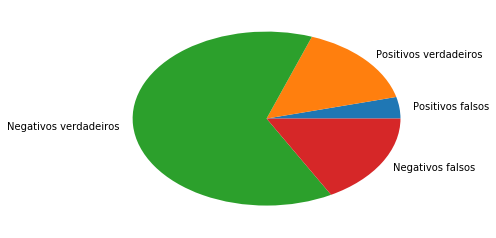

In [6]:
pie = pd.DataFrame({"": [pfalsos, pverdadeiros, nverdadeiros, nfalsos]}, index = ["Positivos falsos", "Positivos verdadeiros", "Negativos verdadeiros", "Negativos falsos"])
plot = pie.plot.pie(y='', legend= False)

 Após aplicar o classificador na base de testes, a performance descrita no gráfico acima foi obtida. Relativamente, a maior porcentagem de classificação foi de "verdadeiros". Os eventuais erros obtidos decorrem da possível mudança de sentimento no momento do treinamento da base e da pequena quantidade de tweets analisados. Os tweets ao serem separados para a comparação, contendo ou não sarcasmo e dupla negação, são tratados da mesma forma que os outros, ou seja, palavra por palavra é analisada em relação a relevância e não relevância e são comparadas.
 
 Um possível plano de expansão seria a aplicação do projeto em outros produtos da empresa, visando posteriormente classificá-los, analisá-los e compará-los de maneira mais efetiva e ampla, gerando ações positivas da equipe de marketing e até mesmo na forma como os projetos podem ser desenvolvidos dentro da companhia.
 
 Vale mencionar que não seria possível alimentar a base de treinamento automaticamente, utilizando o próprio classificador, devido ao fato de que esses novos tweets não estariam sendo classificados com o sentimento utilizado anteriormente para a base e sim classificados de acordo com o algorítimo pré-estabelecido, ou seja, na prática, funcionariam apenas como mais base de testes.
 
 O classificador poderia ser aplicado a contextos diversificados com bastante eficiência, como por exemplo no período eleitoral, para a monitoração do que a população pensa sobre algum candidato a algum cargo público, gerando estratégias de "marketing eleitoral" direcionadas. Outro exemplo seria a aplicação do classificador para monitorar projetos que o governo desenvolveu e implementou, buscando o feedback de maneira eficiente.
 
 Para aprimorar o projeto, uma ideia válida seria expandir a base de dados, aumentando significamente o número de tweets analisados e consequentemente a base de treinamento. Além disso, uma criação de mais categorias para classificação seria adequado, voltados ao direcionamento da área de marketing em tweets positivos ou negativos para o nome da empresa ou do produto. Com essas medidas, o classificador se tornaria mais eficiente e seria mais funcional.